# Random Numbers

All the functionality you need is contained in the `random` package, a sub-package of `numpy`. `random` has a number of methods you can call:

- `seed()` set the random seed, so that your results are the reproducible between simulations. Takes an integer as an argument.

In [1]:
import numpy as np

np.random.seed(123)

- `rand()` generates a random float between 0 and 1 when NO arguments are supplied. Otherwise returns a numpy array of the given shape, propagated with floats between 0 and 1.

In [2]:
np.random.rand(4)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477])

In [3]:
np.random.rand(4,3)

array([[0.71946897, 0.42310646, 0.9807642 ],
       [0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224],
       [0.0596779 , 0.39804426, 0.73799541]])

In [4]:
np.random.rand(4,3,2)

array([[[0.18249173, 0.17545176],
        [0.53155137, 0.53182759],
        [0.63440096, 0.84943179]],

       [[0.72445532, 0.61102351],
        [0.72244338, 0.32295891],
        [0.36178866, 0.22826323]],

       [[0.29371405, 0.63097612],
        [0.09210494, 0.43370117],
        [0.43086276, 0.4936851 ]],

       [[0.42583029, 0.31226122],
        [0.42635131, 0.89338916],
        [0.94416002, 0.50183668]]])

- `randint()` takes an integer argument, returning a random integer between 0 and the argument exclusively. Takes an optional 2nd argument, in which case generates an integer between the 1st(inclusively) and 2nd argument(exclusively).

In [5]:
np.random.randint(4)

3

In [6]:
np.random.randint(2,5)

4

In [7]:
# random walk - heads or tails
tails = [0]
for i in range(10):
    coin = np.random.randint(0,2)
    print(coin)
    tails.append(tails[i] + coin)
print(tails)

0
0
0
1
0
1
1
0
1
1
[0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 5]


In [8]:
# random walk with dice
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # use max to make sure step can't go below 0
        step = max(step - 1, 0)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 1, 2, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 8, 7, 6, 7, 6, 7, 8, 9, 11, 10, 11, 12, 13, 14, 15, 14, 13, 14, 13, 14, 15, 14, 17, 18, 19, 20, 19, 20, 21, 25, 24, 23, 25, 24, 25, 27, 28, 29, 34, 33, 34, 35, 36, 37, 38, 37, 42, 43, 44, 45, 44, 43, 42, 41, 40, 41, 42, 43, 49, 48, 47, 46, 47, 48, 49, 48, 49, 50, 49, 54, 55, 54, 53, 52, 51, 52, 51, 50, 52, 53, 56, 57, 59, 60, 61, 62, 61]


In [9]:
# plot the random walk using 'matplotlib'
# if you pass hust one argument, the list index will be used for the x-axis
import matplotlib.pyplot as plt

plt.plot(random_walk)
plt.show();

<Figure size 640x480 with 1 Axes>

A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. That's exactly what you'll do in this exercise.

In [10]:
# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10):

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

`all_walks` is a list of lists: every sub-list represents a single random walk. If you convert this list of lists to a Numpy array, you can visualize `all_walks`

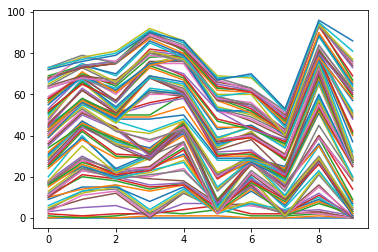

In [11]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

Transpose `np_aw` by calling `np.transpose()` on `np_aw`. Now every row in `np_all_walks` represents the position after 1 throw for the 10 random walks.

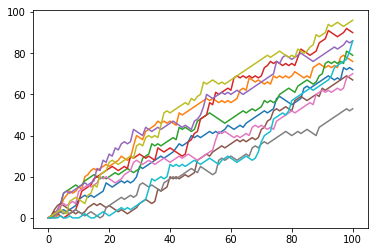

In [12]:
# clear the plot
plt.clf()

# Transpose np_aw
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

Changing the number of times the random walk should be simulated is super-easy. You simply update the `range()` function in the top-level for loop.

There's still something we forgot! You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between `0` and `1`. If this value is less than or equal to `0.001`, you should reset step to `0`.

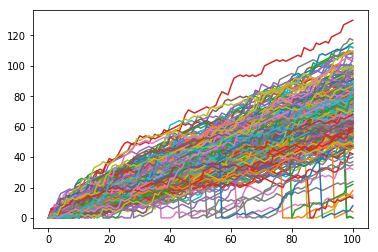

In [13]:
# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

We still have to solve the million-dollar problem: What are the odds that you'll reach 60 steps high on the Empire State Building?

Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

First Simulate the random walk 500 times.

From `np_aw_t`, select the last row. This contains the endpoint of all 500 random walks you've simulated. Store this Numpy array as `ends`.

Use `plt.hist()` to build a histogram of `ends`.

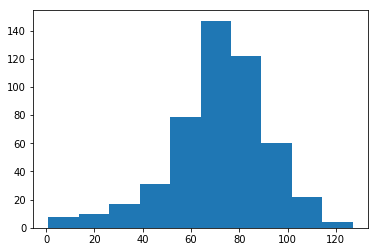

In [14]:
# numpy and matplotlib imported, seed set

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

The histogram of the previous exercise was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [15]:
np.mean(ends >= 60)

0.768